# Exemplo Imagem Binária

##Abrindo Imagem

In [28]:
from skimage import io

img = io.imread('https://github.com/sbarbonjr/Imagem_AprendizadoMaquina/blob/main/images/Alien_pixel_tiny.png?raw=true')
print(img.shape)
print(img)

(8, 16)
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0 255 255   0   0 255 255   0 255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255]
 [255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0 255 255   0 255 255 255 255 255 255]]


##Visualizando Image

In [29]:
import pandas as pd 

obj = pd.DataFrame(img)
obj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,0,0,0,0,0,0,255,255,255,255,255
3,255,255,255,255,0,255,255,0,0,255,255,0,255,255,255,255
4,255,255,255,0,0,0,0,0,0,0,0,0,0,255,255,255
5,255,255,255,255,255,0,0,0,0,0,0,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,0,255,255,0,255,255,255,255,255,255


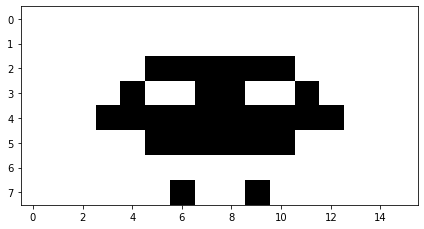

In [30]:
io.imshow(img) 
io.show()

## Histograma da Imagem

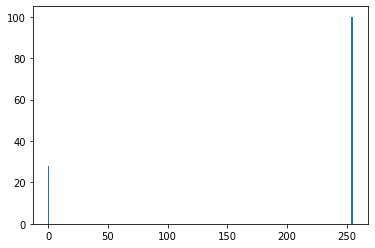

In [31]:
import matplotlib.pyplot as plt

plt.hist(img.ravel(), bins = 256) #ravel() "achata" uma matriz para um vetor (1D)
plt.show()

## Estatísticas sobre os pixels

In [32]:
import pandas as pd

df_describe = pd.DataFrame(img.ravel())
df_describe.describe()

,0
count,128.000000
mean,199.218750
std,105.830866
min,0.000000
25%,255.000000
50%,255.000000
75%,255.000000
max,255.000000


# Exemplo de Segmentação

# Carregando imagem "camera"

In [33]:
from skimage import data
from skimage import filters

camera = data.camera()
print(camera)
print(camera.shape)

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]
(512, 512)


#Visualizando Imagem

In [34]:
import pandas as pd 
pd.DataFrame(camera)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,200,200,200,200,199,200,199,198,199,198,...,190,190,190,189,190,190,189,189,190,190
1,200,199,199,200,199,200,199,198,198,199,...,190,191,189,189,189,190,190,190,190,190
2,199,199,199,200,200,200,200,200,200,200,...,191,190,190,190,189,190,190,190,190,190
3,200,200,199,199,199,199,199,199,198,199,...,191,190,191,191,190,190,190,190,190,190
4,200,200,200,200,199,199,199,200,199,199,...,190,191,191,190,191,191,190,191,190,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,26,25,26,25,24,25,26,24,25,24,...,165,170,172,162,141,150,174,135,118,117
508,25,26,26,24,24,26,25,23,25,23,...,157,150,158,161,150,106,172,153,149,165
509,25,25,27,24,24,28,24,26,25,23,...,155,159,174,166,155,152,176,139,122,147
510,25,25,26,24,24,27,25,25,25,25,...,149,142,171,169,145,140,139,158,141,168


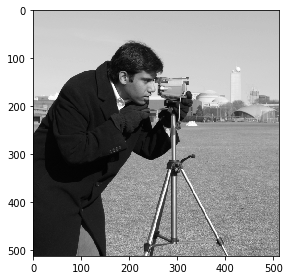

In [35]:
io.imshow(camera)

# Limiarização com Otsu

102


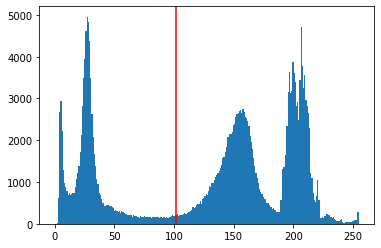

In [36]:
val = filters.threshold_otsu(camera)
print(val)
plt.hist(camera.ravel(), bins = 256) #ravel() "achata" uma matriz para um vetor (1D)
plt.axvline(x = val, color = 'r')
plt.show()

## Aplicando Máscara

In [37]:

mask = camera < val
pd.DataFrame(mask)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
508,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
509,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
510,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


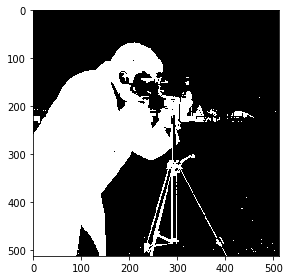

In [38]:
io.imshow(mask)

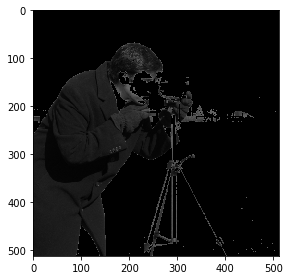

In [39]:
io.imshow(camera*mask)

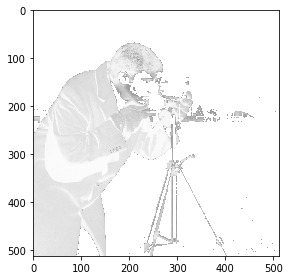

In [40]:
invert = np.invert(camera*mask)
io.imshow(invert)

# Contagem de Particulas

(1055, 1583, 3)


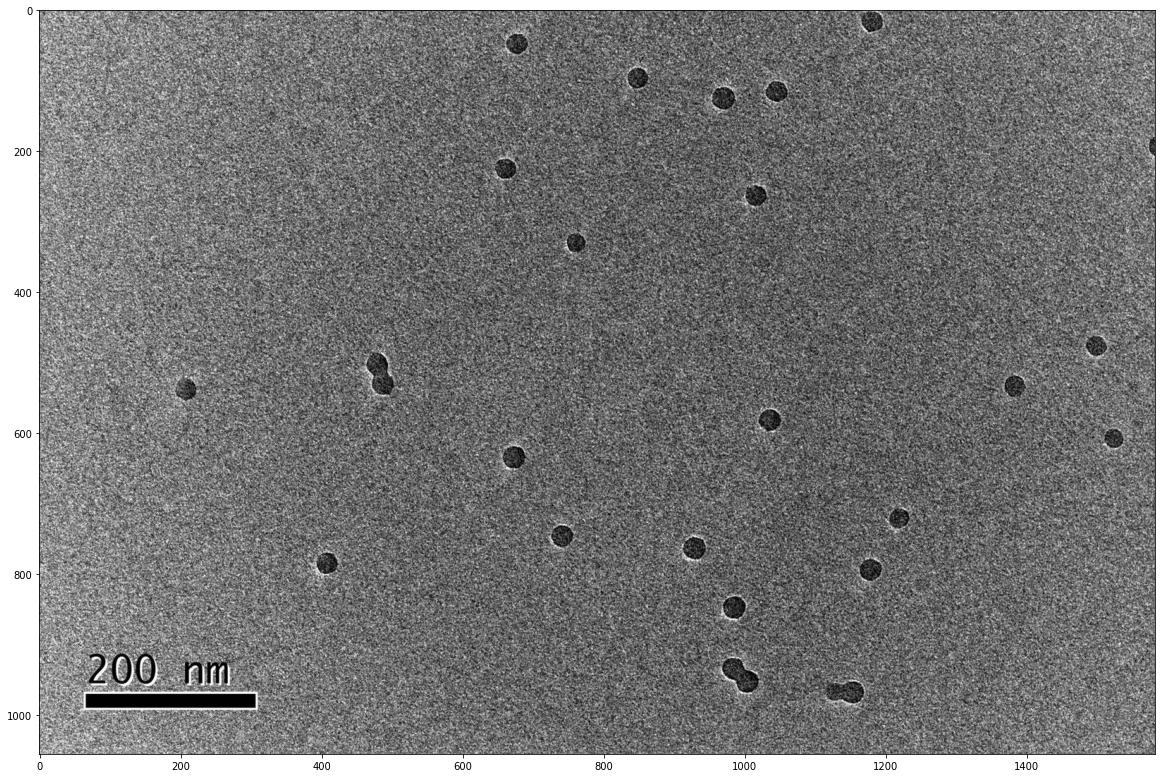

In [119]:
from skimage import io
from skimage.feature import peak_local_max
from skimage.measure import regionprops
from skimage.segmentation import watershed
from scipy.ndimage import binary_erosion, binary_dilation, distance_transform_edt
from scipy.ndimage import label
from skimage.filters import gaussian

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

img = io.imread('https://github.com/sbarbonjr/Imagem_AprendizadoMaquina/blob/main/images/obvvX.jpg?raw=true')
print(img.shape)
plt.figure(figsize = (20,18))
plt.imshow(img)

(1055, 1583, 3)
(1055, 1583)


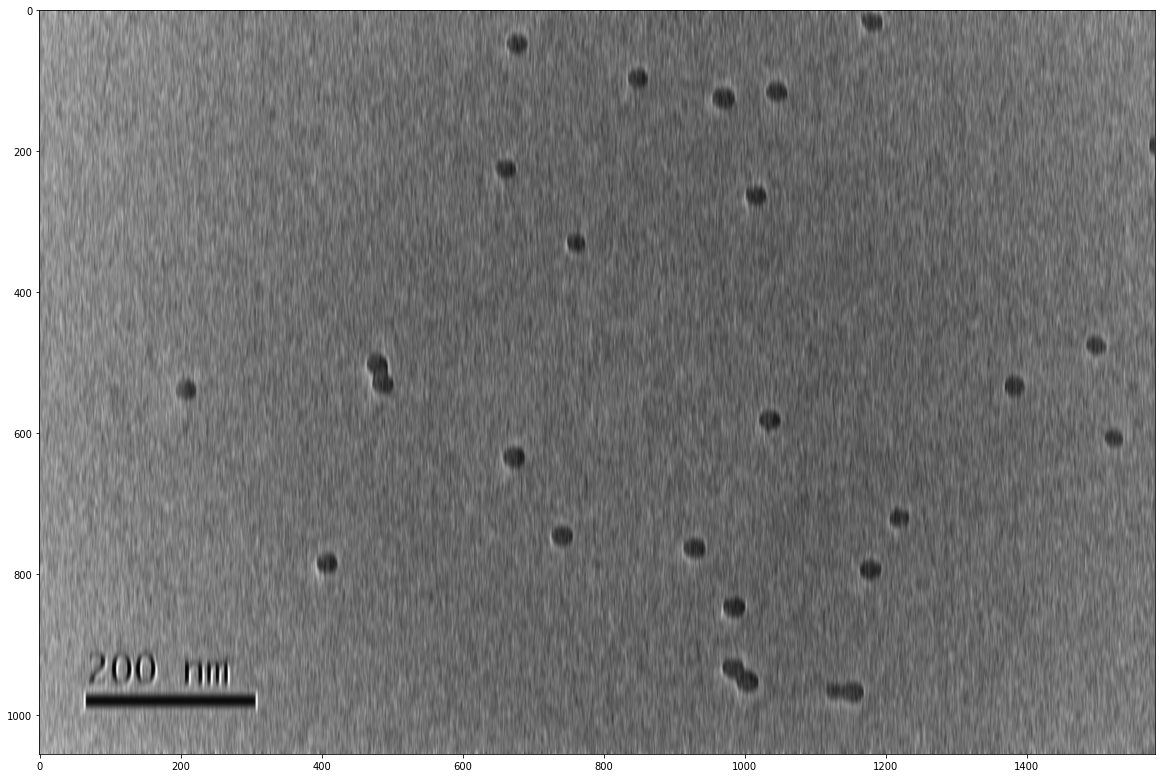

In [122]:
a = gaussian(img, sigma=5, channel_axis=1)
print(a.shape)
a = np.sum(a, axis=2)
print(a.shape)
plt.figure(figsize = (20,18))
plt.imshow(a,cmap="gray")

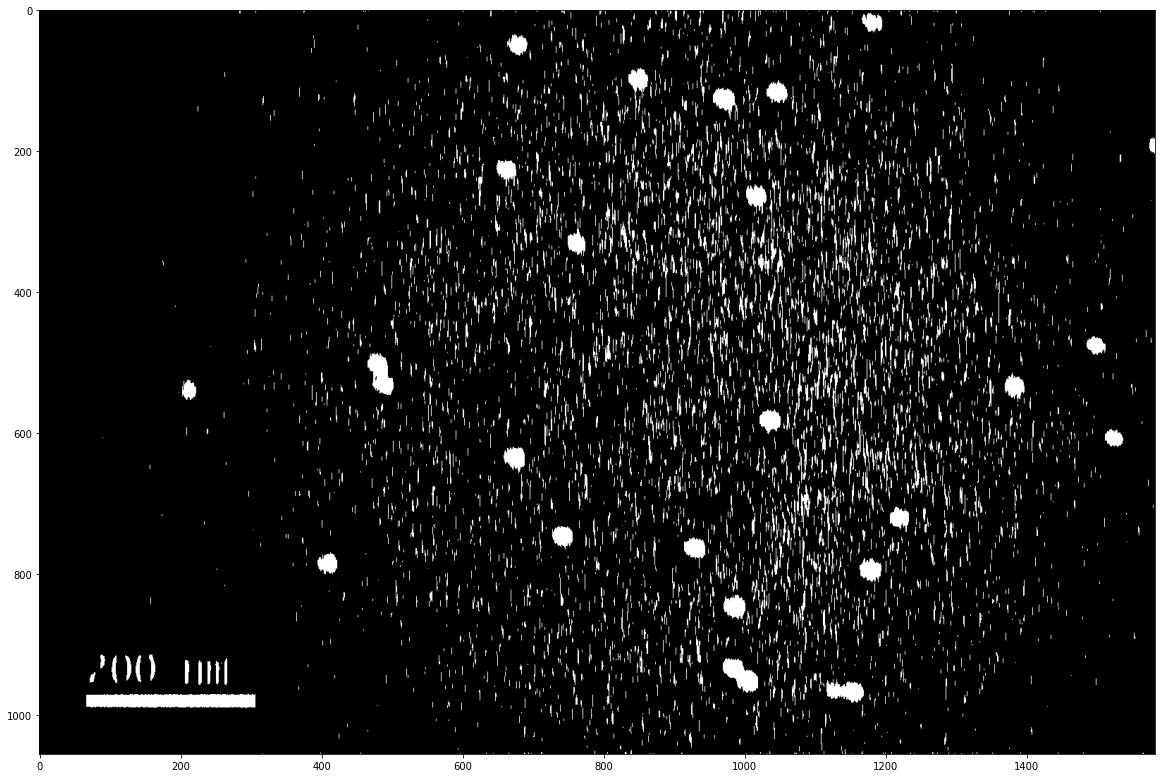

In [124]:
a_thr = a < 1
plt.figure(figsize = (20,18))
plt.imshow(a_thr, cmap="gray")

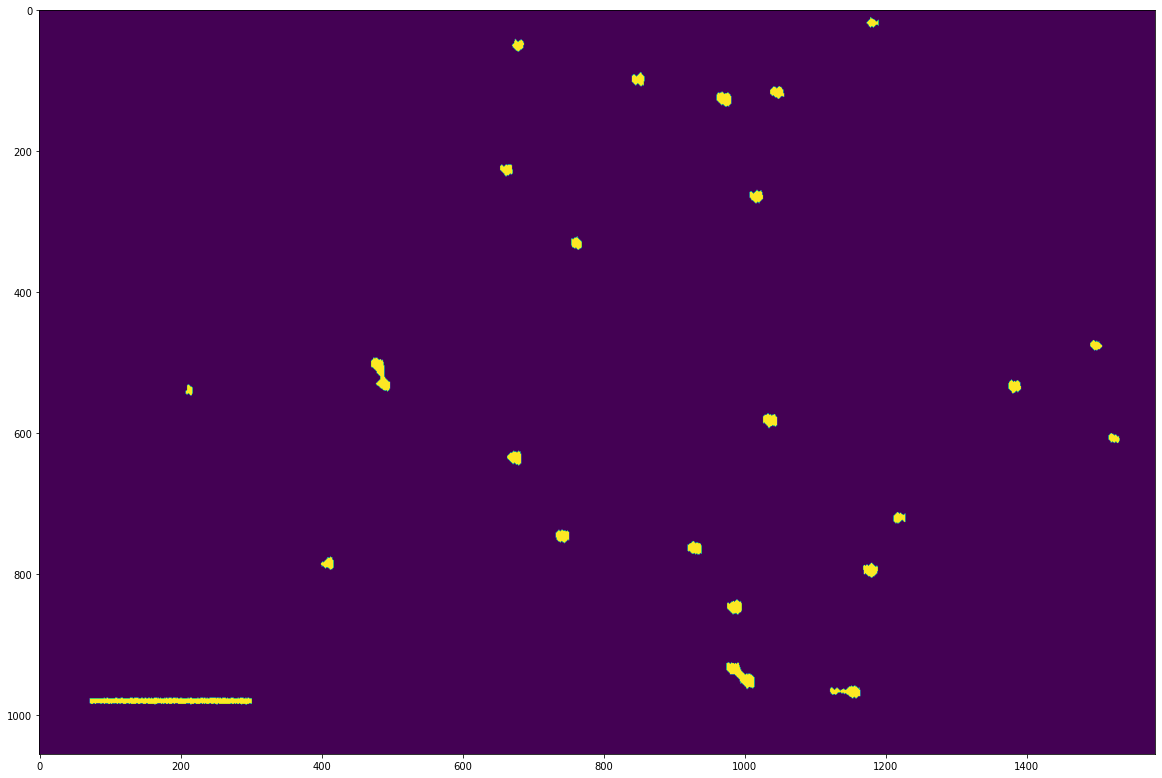

In [125]:
a_thr = binary_erosion(a_thr, iterations = 5)
plt.figure(figsize = (20,18))
plt.imshow(a_thr)

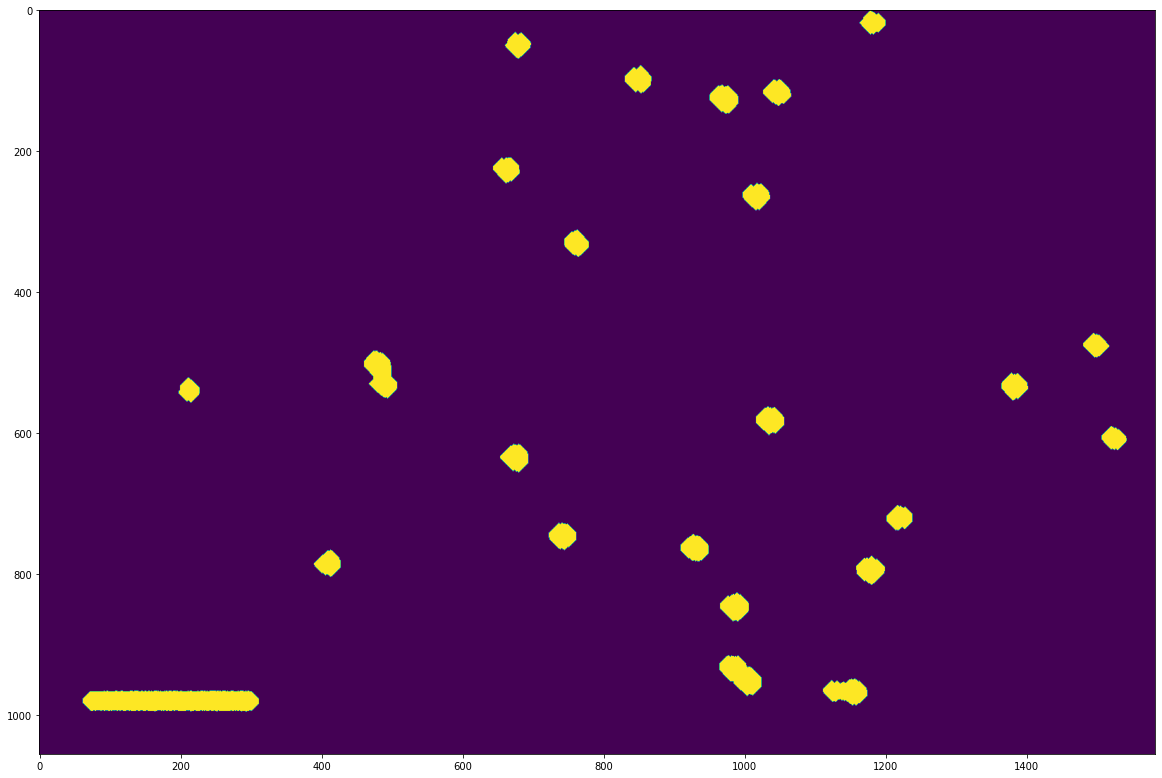

In [127]:
a_thr = binary_dilation(a_thr, iterations = 5)
plt.figure(figsize = (20,18))
plt.imshow(a_thr)

In [128]:
distances = distance_transform_edt(a_thr)
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,...,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<ipython-input-136-a889417222b5>:1: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  seeds = peak_local_max(distances, indices=False, min_distance=20)


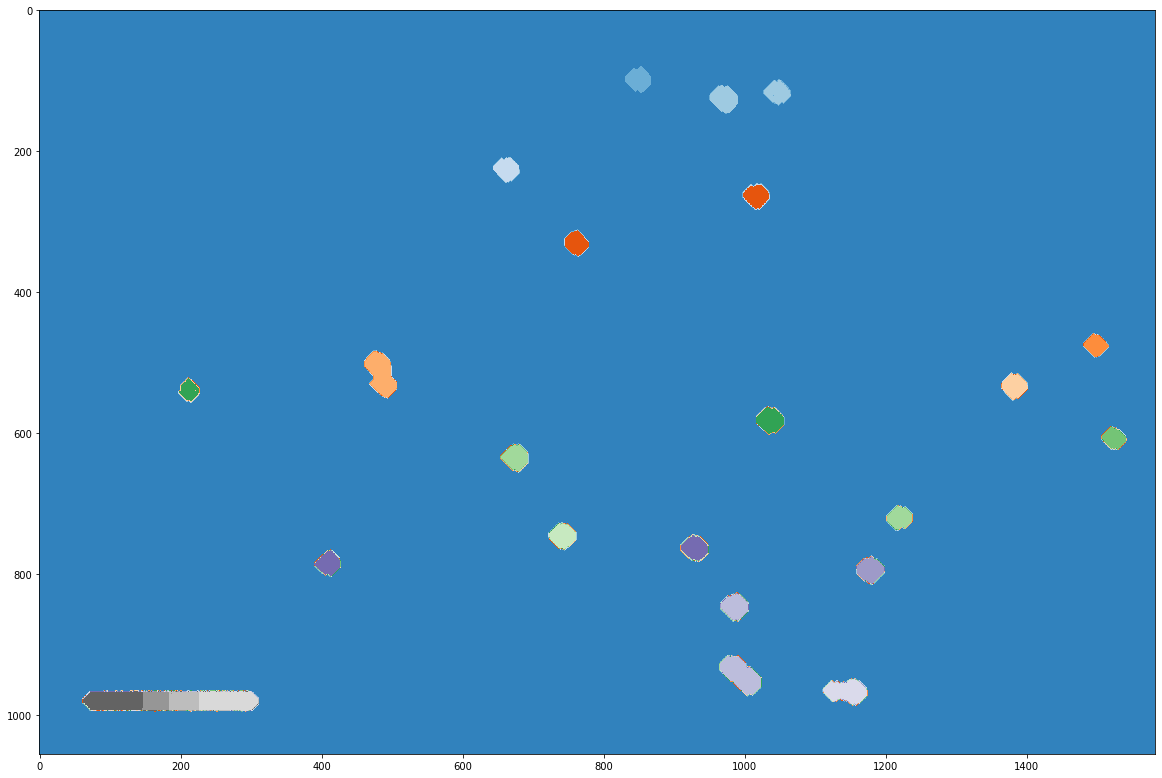

In [136]:
seeds = peak_local_max(distances, indices=False, min_distance=20)
seeds = label(seeds)[0]
#pd.DataFrame(seeds)
#print(seeds)

ws = watershed(a, seeds, mask=a_thr)
plt.figure(figsize = (20,18))
plt.imshow(ws, cmap='tab20c')

In [142]:
regions = regionprops(ws)
#print(regions)
regions = [r for r in regions if r.area > 50]

print('Numero de objetos:', len(regions) - 1)

Numero de objetos: 29
